# all questions solutions

In [41]:
# load modules

from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import col
from pyspark.sql.window import Window

spark = SparkSession.builder.appName('AllSolutionsPujan').getOrCreate()

In [3]:
# load weather data
weather_df = spark\
                .read\
                .option('inferSchema', 'true')\
                .option('header', 'true')\
                .csv('../cleaned_data/cleaned_weather_data.csv')

weather_df.cache().show(10)
weather_df.printSchema()

+-------------------+--------+-------+---------+---------+----+----+----+----+------+
|               date| country|   city| Latitude|Longitude|tavg|tmin|tmax|wspd|  pres|
+-------------------+--------+-------+---------+---------+----+----+----+----+------+
|2018-07-21 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|23.4|20.9|25.5| 9.3|1009.6|
|2018-07-22 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|23.5|21.0|25.7| 9.4|1010.0|
|2018-07-23 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|23.5|21.1|25.5| 8.2|1007.7|
|2018-07-24 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|24.3|20.8|27.1| 9.3|1004.4|
|2018-07-25 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|26.5|22.7|30.0| 9.7|1002.0|
|2018-07-26 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|26.7|24.6|28.7| 9.8|1006.7|
|2018-07-27 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|26.5|24.6|28.1| 8.4|1009.1|
|2018-07-28 00:00:00|Abkhazia|Sukhumi|43.001525|41.023415|26.4|24.5|28.2| 8.6|1007.5|
|2018-07-29 00:00:00|Abkhazia|Sukhumi|43.001525|41.023

In [6]:
# load continents data

continents_df = spark\
                    .read\
                    .option('inferSchema', 'true')\
                    .option('header', 'true')\
                    .csv('../cleaned_data/cleaned_country_continent.csv')

continents_df.cache().show(10)
continents_df.printSchema()

22/11/03 10:33:33 WARN CacheManager: Asked to cache already cached data.
+-------------------+---------+
|            country|continent|
+-------------------+---------+
|        Afghanistan|     Asia|
|      �land Islands|   Europe|
|            Albania|   Europe|
|            Algeria|   Africa|
|     American Samoa|  Oceania|
|            Andorra|   Europe|
|             Angola|   Africa|
|           Anguilla| Americas|
|Antigua and Barbuda| Americas|
|          Argentina| Americas|
+-------------------+---------+
only showing top 10 rows

root
 |-- country: string (nullable = true)
 |-- continent: string (nullable = true)



## Qn. 1. Find the global average temperature each year. Is it increasing ?

In [99]:
global_avg_temp_df = weather_df\
        .groupBy(F.year('date').cast('integer').alias('year'))\
        .agg(F.mean('tavg').alias('tavg'))\
        .select('year', F.round('tavg', 1).alias('global_avg_temp'))\
        .orderBy('year')

global_avg_temp_df.show()

+----+---------------+
|year|global_avg_temp|
+----+---------------+
|2018|           20.4|
|2019|           20.9|
|2020|           21.0|
|2021|           20.9|
|2022|           21.4|
+----+---------------+



<AxesSubplot: xlabel='year', ylabel='global_avg_temp'>

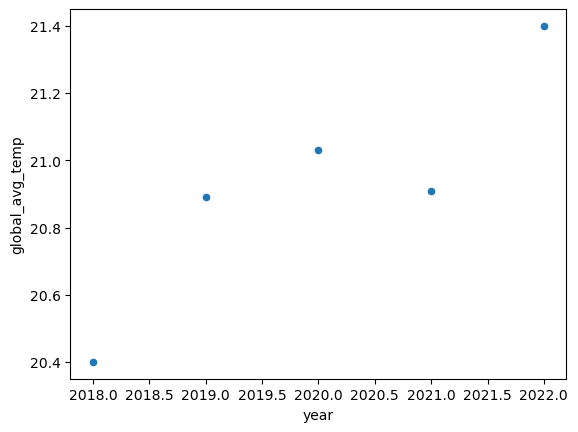

In [16]:
global_avg_temp_df.toPandas().plot.scatter(x='year', y='global_avg_temp')

we can see that the global average temperature is slightly increasing, however there is a downward trend in year 2021, which might be due to covid pandemic. The temperature increases slightly every year, but this doesn't give us the actual temperature variations because data on temperatures above oceans are not measured.

## Qn. 2. Correlation and population covariance between wind speed and air pressure.

In [19]:
corr_covar_df = weather_df.select(F.corr('wspd', 'pres'), F.covar_pop('wspd', 'pres'))

corr_covar_df.show()

+-------------------+---------------------+
|   corr(wspd, pres)|covar_pop(wspd, pres)|
+-------------------+---------------------+
|-0.1128079337787976|   -5.785491862972515|
+-------------------+---------------------+



correlation of -0.112 suggests that the wspd and pressure are slightly negatively correlated i.e. as wspd increases pressure slightly decreases and vice versa. Similarly covariance of -5.78 suggests the same.

## Qn. 3. Max temperature for each country in the month of July each year.

In [29]:
max_temp_july_df = weather_df\
                    .groupBy(F.year('date').alias('year'), F.month('date').alias('month'), 'country')\
                    .agg(F.max('tmax').alias('max_temp'))\
                    .filter('month == 7')\
                    .orderBy('country', 'year')

max_temp_july_df.show()

+----+-----+-------------+--------+
|year|month|      country|max_temp|
+----+-----+-------------+--------+
|2018|    7|     Abkhazia|    30.0|
|2019|    7|     Abkhazia|    29.9|
|2020|    7|     Abkhazia|    29.4|
|2021|    7|     Abkhazia|    31.0|
|2022|    7|     Abkhazia|    27.8|
|2018|    7|Aland Islands|    30.3|
|2019|    7|Aland Islands|    30.1|
|2020|    7|Aland Islands|    22.3|
|2021|    7|Aland Islands|    28.1|
|2022|    7|Aland Islands|    24.4|
|2018|    7|      Albania|    35.7|
|2019|    7|      Albania|    36.3|
|2020|    7|      Albania|    37.4|
|2021|    7|      Albania|    40.1|
|2022|    7|      Albania|    38.5|
|2018|    7|      Algeria|    35.7|
|2019|    7|      Algeria|    41.7|
|2020|    7|      Algeria|    36.7|
|2021|    7|      Algeria|    38.5|
|2022|    7|      Algeria|    36.3|
+----+-----+-------------+--------+
only showing top 20 rows



## Qn. 4. Standard deviation of max temperature for each country in the month of july each year.

In [98]:
# calculate the standard deviation for each country
stddev_max_temp_july_df = max_temp_july_df\
                            .groupBy('country')\
                            .agg(F.stddev('max_temp').alias('stddev'))\
                            .orderBy('country')\
                            .select('country',F.round('stddev', 1).alias('stddev_max_temp_july'))

stddev_max_temp_july_df.show()

+-------------------+--------------------+
|            country|stddev_max_temp_july|
+-------------------+--------------------+
|           Abkhazia|                 1.2|
|      Aland Islands|                 3.6|
|            Albania|                 1.8|
|            Algeria|                 2.4|
|     American Samoa|                 0.4|
|             Angola|                 1.2|
|           Anguilla|                 0.9|
|Antigua and Barbuda|                 0.4|
|          Argentina|                 2.6|
|              Aruba|                 0.9|
|            Austria|                 1.3|
|         Azerbaijan|                 2.5|
|            Bahamas|                 0.6|
|            Bahrain|                 1.2|
|         Bangladesh|                 0.8|
|           Barbados|                 0.8|
|            Belarus|                 2.4|
|            Belgium|                 5.1|
|            Bermuda|                 0.6|
|      Bouvet Island|                 0.6|
+----------

## Qn. 5. Min temperature that each country has ever had and the date at which it happened (window function)

In [46]:
window_spec = Window.partitionBy('country').orderBy('tmin')

ranked_df = weather_df.withColumn('dense_rn', F.dense_rank().over(window_spec)).filter('dense_rn == 1')

min_temp_df = ranked_df.select('date', 'country', col('tmin').alias('min_temp'))

min_temp_df.show()

+-------------------+--------------------+--------+
|               date|             country|min_temp|
+-------------------+--------------------+--------+
|2020-02-10 00:00:00|            Abkhazia|    -4.1|
|2019-01-08 00:00:00|             Albania|    -9.4|
|2019-01-08 00:00:00|             Algeria|    -0.3|
|2018-08-26 00:00:00|              Angola|    15.0|
|2018-03-13 00:00:00|            Anguilla|    19.6|
|2022-07-17 00:00:00|           Argentina|     1.9|
|2018-02-28 00:00:00|             Belgium|    -8.5|
|2021-09-03 00:00:00|British Virgin Is...|    19.6|
|2021-01-14 00:00:00|            Cambodia|    14.1|
|2018-12-24 00:00:00|                Chad|    10.8|
|2021-09-12 00:00:00|             Comoros|    13.1|
|2018-04-05 00:00:00|       Côte d'Ivoire|    11.8|
|2022-02-05 00:00:00|            Djibouti|    17.7|
|2021-01-24 00:00:00|            Dominica|    20.6|
|2021-02-21 00:00:00|            Dominica|    20.6|
|2021-03-12 00:00:00|            Dominica|    20.6|
|2021-03-20 

## Qn. 6. Find the 5 coldest days in Canada (use min avg temp) (Window Function)

In [117]:
window_spec = Window.partitionBy('country').orderBy('tavg')
ranked_df = weather_df\
                .withColumn('dense_rn', F.dense_rank().over(window_spec))\
                .filter('dense_rn <= 5')\
                .filter('country == "Canada"')

coldest_days_in_Canada_df = ranked_df.select('date', 'country', col('tavg').alias('avg_temperature'), col('dense_rn').alias('rank'))
coldest_days_in_Canada_df.show()

+-------------------+-------+---------------+----+
|               date|country|avg_temperature|rank|
+-------------------+-------+---------------+----+
|2022-01-21 00:00:00| Canada|          -24.2|   1|
|2018-01-01 00:00:00| Canada|          -23.5|   2|
|2022-01-22 00:00:00| Canada|          -23.5|   2|
|2018-01-06 00:00:00| Canada|          -22.9|   3|
|2022-01-15 00:00:00| Canada|          -22.3|   4|
|2018-01-05 00:00:00| Canada|          -22.2|   5|
+-------------------+-------+---------------+----+



## Qn. 7. Difference of each country’s average temperature from global average temperature for 2019.

In [100]:
avg_temp_df = weather_df\
                .filter(F.year('date') == 2019)\
                .groupBy('country')\
                .agg(F.mean('tavg').alias('avg_temp'))\
                .orderBy('country')

avg_temp_df.show()

global_avg_temp = round(weather_df.select(F.mean('tavg')).collect()[0][0], 1)
global_avg_temp # 20.9

diff_global_avg_temp_df = avg_temp_df\
                            .withColumn('year', F.lit(2019))\
                            .withColumn('avg_temp', F.round('avg_temp', 1))\
                            .withColumn('global_avg_temp', F.lit(global_avg_temp))\
                            .withColumn('difference', F.round(col('avg_temp') - col('global_avg_temp'), 1))

diff_global_avg_temp_df = diff_global_avg_temp_df.select('year', 'country', 'avg_temp', 'global_avg_temp', 'difference')

diff_global_avg_temp_df.show()

+-------------------+-------------------+
|            country|           avg_temp|
+-------------------+-------------------+
|           Abkhazia|  14.61452054794519|
|      Aland Islands|  7.079670329670329|
|            Albania|  16.56043956043955|
|            Algeria|  19.44136986301369|
|     American Samoa| 27.412054794520497|
|             Angola| 25.894794520547933|
|           Anguilla| 27.278904109589043|
|Antigua and Barbuda| 26.718630136986313|
|          Argentina|  17.93863013698628|
|              Aruba|  28.00821917808217|
|            Austria| 14.126373626373633|
|         Azerbaijan| 15.416164383561656|
|            Bahamas| 25.767582417582407|
|            Bahrain| 27.899999999999974|
|         Bangladesh| 26.225753424657544|
|           Barbados|  27.50328767123287|
|            Belarus|  9.316438356164383|
|            Belgium| 11.746703296703302|
|            Bermuda| 22.324725274725253|
|      Bouvet Island|-0.5103641456582632|
+-------------------+-------------

## Qn. 8. Rolling average of temperature in Belgium for the month of July 2019 (Window Function)

In [93]:
window_spec = Window.partitionBy('country').orderBy('date').rowsBetween(Window.unboundedPreceding, Window.currentRow)

belgium_july_2019_df = weather_df\
                        .filter(F.year('date') == 2019)\
                        .filter(F.month('date') == 7)\
                        .filter('country == "Belgium"')\
                        .withColumn('rolling_avg', F.mean('tavg').over(window_spec))\
                        .select('date', 'country', 'tavg', F.round('rolling_avg', 1).alias('rolling_avg'))

belgium_july_2019_df.show()

+-------------------+-------+----+-----------+
|               date|country|tavg|rolling_avg|
+-------------------+-------+----+-----------+
|2019-07-01 00:00:00|Belgium|18.6|       18.6|
|2019-07-02 00:00:00|Belgium|18.0|       18.3|
|2019-07-03 00:00:00|Belgium|17.2|       17.9|
|2019-07-04 00:00:00|Belgium|17.7|       17.9|
|2019-07-05 00:00:00|Belgium|19.7|       18.2|
|2019-07-06 00:00:00|Belgium|19.9|       18.5|
|2019-07-07 00:00:00|Belgium|16.9|       18.3|
|2019-07-08 00:00:00|Belgium|15.0|       17.9|
|2019-07-09 00:00:00|Belgium|16.3|       17.7|
|2019-07-10 00:00:00|Belgium|18.4|       17.8|
|2019-07-11 00:00:00|Belgium|20.3|       18.0|
|2019-07-12 00:00:00|Belgium|18.0|       18.0|
|2019-07-13 00:00:00|Belgium|17.4|       18.0|
|2019-07-14 00:00:00|Belgium|16.1|       17.8|
|2019-07-15 00:00:00|Belgium|15.0|       17.6|
|2019-07-16 00:00:00|Belgium|16.5|       17.6|
|2019-07-17 00:00:00|Belgium|18.6|       17.6|
|2019-07-18 00:00:00|Belgium|19.3|       17.7|
|2019-07-19 0

## Qn. 9. Find hottest and coldest day of UK for each month in 2020 (use tmin, tmax)

In [144]:
window_spec1 = Window.partitionBy('country', F.year('date'), F.month('date')).orderBy('tmin')
window_spec2 = Window.partitionBy('country', F.year('date'), F.month('date')).orderBy(F.desc('tmax'))

weather_df\
        .filter('country == "United Kingdom"')\
        .filter(F.year('date') == 2020)\
        .withColumn('min_rank', F.dense_rank().over(window_spec1))\
        .withColumn('max_rank', F.dense_rank().over(window_spec2))\
        .withColumn('is_min_or_max', F.when(col('min_rank') == 1, F.lit('min')).when(col('max_rank') == 1, F.lit('max')))\
        .filter((col('min_rank') == 1) | (col('max_rank') == 1))\
        .select(F.to_date('date').alias('date'), 'country', 'tmin', 'tmax', 'is_min_or_max')\
        .show()

+----------+--------------+----+----+-------------+
|      date|       country|tmin|tmax|is_min_or_max|
+----------+--------------+----+----+-------------+
|2020-01-14|United Kingdom| 6.1|11.7|          max|
|2020-01-20|United Kingdom|-2.0| 6.0|          min|
|2020-02-16|United Kingdom| 4.9|12.3|          max|
|2020-02-28|United Kingdom| 0.3| 9.8|          min|
|2020-03-10|United Kingdom| 9.1|14.1|          max|
|2020-03-30|United Kingdom|-0.2| 6.3|          min|
|2020-04-11|United Kingdom| 9.0|22.5|          max|
|2020-04-01|United Kingdom|-0.9| 8.0|          min|
|2020-05-21|United Kingdom|13.1|24.6|          max|
|2020-05-12|United Kingdom| 1.7|11.8|          min|
|2020-05-14|United Kingdom| 1.7|10.6|          min|
|2020-06-25|United Kingdom|16.3|29.6|          max|
|2020-06-06|United Kingdom| 5.0|11.9|          min|
|2020-07-31|United Kingdom|15.5|31.7|          max|
|2020-07-11|United Kingdom| 7.7|17.9|          min|
|2020-08-07|United Kingdom|15.5|32.8|          max|
|2020-08-31|